In [31]:
## import necessary libraries
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [32]:
## read in data, came in 2 separate files 
# one contains features and the other contains the corresponding labels
features = pd.read_csv('training_set_features.csv')
labels = pd.read_csv('training_set_labels.csv')

## concatenate the training features and labels into a single DataFrame for cleaning and exploration
flu_df = pd.concat([features, labels.drop('respondent_id', axis=1)], axis=1)
flu_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,3.000,1.000,2.000,2.000,1.000,2.000,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.000,0.000,NaN,NaN,0,0
1,1,3.000,2.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,5.000,4.000,4.000,4.000,2.000,4.000,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.000,0.000,pxcmvdjn,xgwztkwe,0,1
2,2,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,nan,nan,1.000,0.000,0.000,nan,3.000,1.000,1.000,4.000,1.000,2.000,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.000,0.000,rucpziij,xtkaffoo,0,0
3,3,1.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,nan,3.000,3.000,5.000,5.000,4.000,1.000,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.000,0.000,NaN,NaN,0,1
4,4,2.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,nan,3.000,3.000,2.000,3.000,1.000,4.000,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.000,0.000,wxleyezf,emcorrxb,0,0


In [33]:
## focus of problem is on seasonal flu vaccines, so information most specific to h1n1 won't be needed
# drop specific h1n1 cols from df
flu_df.drop(columns=['opinion_h1n1_vacc_effective',
                 'opinion_h1n1_risk',
                 'opinion_h1n1_sick_from_vacc',
                 'doctor_recc_h1n1',
                 'h1n1_vaccine'], axis=1, inplace=True)

## also, very little variation in behavioral_antiviral_meds and relatively unrelated to target,
## so drop that and also respondent_id
flu_df.drop(columns=['behavioral_antiviral_meds', 'respondent_id'], axis=1, inplace=True)

# check new df
flu_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,seasonal_vaccine
0,1.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,2.000,1.000,2.000,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.000,0.000,NaN,NaN,0
1,3.000,2.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,4.000,2.000,4.000,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.000,0.000,pxcmvdjn,xgwztkwe,1
2,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,nan,1.000,0.000,0.000,nan,4.000,1.000,2.000,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.000,0.000,rucpziij,xtkaffoo,0
3,1.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,nan,5.000,4.000,1.000,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.000,0.000,NaN,NaN,1
4,2.000,1.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,nan,3.000,1.000,4.000,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.000,0.000,wxleyezf,emcorrxb,0


In [34]:
behavior_cols = [col for col in flu_df.columns if 'behavioral' in col]
behavior_cols

['behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face']

In [35]:
flu_df['behav_score'] = flu_df[behavior_cols].sum(axis=1)
flu_df[behavior_cols+['behav_score']].head()

,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,behav_score
0,0.000,0.000,0.000,0.000,1.000,1.000,2.000
1,1.000,0.000,1.000,0.000,1.000,1.000,4.000
2,1.000,0.000,0.000,0.000,0.000,0.000,1.000
3,1.000,0.000,1.000,1.000,0.000,0.000,3.000
4,1.000,0.000,1.000,1.000,0.000,1.000,4.000


In [36]:
def check_unique(df, col, dropna=False):
    
    """Takes in a Pandas DataFrame and specific column name and returns a Pandas DataFrame 
    displaying the unique values in that column as well as the count of each unique value. 
    Default is to also provide a count of NaN values.
    """
    
    import pandas as pd
        
    unique_vals = pd.DataFrame(df[col].value_counts(dropna=dropna))
    
    return unique_vals


def check_col_distr(df, col):
    
    """Takes in a Pandas DataFrame and specific column name and returns a Pandas DataFrame 
    displaying the unique values in that column as well as the count of each unique value. 
    Also displays a histogram (Seaborn distplot) showing the distribution of the column values.
    """
    
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    ## check counts of unique values in col
    display(check_unique(df, col))

    ## plot distribution of col
    plt.figure(figsize=(7,5))
    fig = sns.distplot(df[col])
    
    return fig

,behav_score
3.000,7368
2.000,4685
5.000,4654
4.000,4329
1.000,2741
0.000,2128
6.000,802


/Users/maxsteele/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='behav_score', ylabel='Density'>

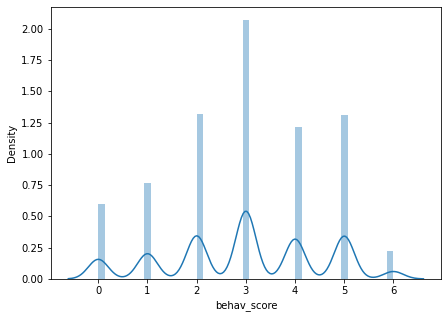

In [37]:
check_col_distr(flu_df, 'behav_score')

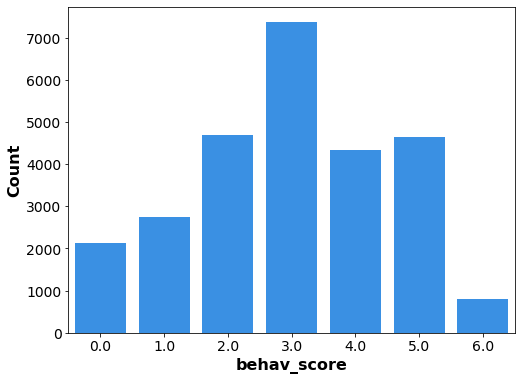

In [38]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x=flu_df['behav_score'], color='dodgerblue')
ax.set_xlabel(ax.get_xlabel(), fontsize=16, fontweight='bold')
ax.tick_params(labelsize=14)
ax.set_ylabel(ax.get_ylabel().title(), fontsize=16, fontweight='bold')
plt.savefig('Figures/behav_score_countplot')
plt.show();

In [39]:
import dataframe_image as dfi

In [40]:
flu_df['behav_to_risk'] = (flu_df['behav_score'] + 1) / flu_df['opinion_seas_risk']
flu_df[['behav_score', 'opinion_seas_risk', 'behav_to_risk']].head()

,behav_score,opinion_seas_risk,behav_to_risk
0,2.000,1.000,3.000
1,4.000,2.000,2.500
2,1.000,1.000,2.000
3,3.000,4.000,1.000
4,4.000,1.000,5.000


In [41]:
behav_feat_df = flu_df[['behav_score', 'opinion_seas_risk', 'behav_to_risk']].head()
# dfi.export(behav_feat_df, 'Figures/behav_feat_df.png')

In [42]:
flu_df['age_group'].value_counts().to_frame()

,age_group
65+ Years,6843
55 - 64 Years,5563
45 - 54 Years,5238
18 - 34 Years,5215
35 - 44 Years,3848


In [43]:
age_grp_vals = flu_df['age_group'].value_counts().to_frame()
# dfi.export(age_grp_vals, 'Figures/age_grp_vals.png')

In [44]:
flu_df['older_65'] = np.where(flu_df['age_group']=='65+ Years', 1, 0)
flu_df[['age_group', 'older_65']].head()

,age_group,older_65
0,55 - 64 Years,0
1,35 - 44 Years,0
2,18 - 34 Years,0
3,65+ Years,1
4,45 - 54 Years,0


In [28]:
older_65_df = flu_df[['age_group', 'older_65']].head()
dfi.export(older_65_df, 'Figures/older_65_df.png')

In [29]:
## define a function to calculate score for high risk of complications
def calc_high_risk(row):
    risk = 0
    if row['older_65'] == 1:
        risk += 1
    if row['child_under_6_months'] == 1:
        risk += 1
    if row['chronic_med_condition'] == 1:
        risk += 1
    return risk

## apply the function to create new column
flu_df['high_risk'] = flu_df.apply(lambda x: calc_high_risk(x), axis=1)

In [30]:
flu_df['high_risk'].value_counts().to_frame()

,high_risk
0,13931
1,9426
2,3205
3,145


In [31]:
risk_vals = flu_df['high_risk'].value_counts().to_frame()
dfi.export(risk_vals, 'Figures/risk_vals.png')

In [32]:
compl_map = {0:'low risk', 1:'med risk', 2:'high risk', 3:'high risk'}
flu_df['high_risk_cat'] = flu_df['high_risk'].map(compl_map)
flu_df['high_risk_cat'].value_counts().to_frame()

,high_risk_cat
low risk,13931
med risk,9426
high risk,3350


In [33]:
risk_cat_df = flu_df['high_risk_cat'].value_counts().to_frame()
dfi.export(risk_cat_df, 'Figures/risk_cat_df.png')

In [34]:
flu_df['health_insurance'].value_counts(dropna=False).to_frame()

,health_insurance
1.000,12697
nan,12274
0.000,1736


In [35]:
flu_df['health_insurance'].fillna(value='missing', inplace=True)
flu_df['health_insurance'].value_counts(dropna=False).to_frame()

,health_insurance
1.0,12697
missing,12274
0.0,1736


In [36]:
## read in csv file
house_df = pd.read_csv('kc_house_data.csv')

## display first 5 rows of DataFrame
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,nan,0.000,3,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0.0,1933,nan,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [37]:
house_df[['date', 'yr_built']].dtypes

date        object
yr_built     int64
dtype: object

In [38]:
import datetime as dt

house_df['sold_dt'] = pd.to_datetime(house_df['date'])
house_df['mo_sold'] = house_df['sold_dt'].dt.month
house_df['yr_sold'] = house_df['sold_dt'].dt.year
house_df['age'] = house_df['sold_dt'].dt.year - house_df['yr_built']

house_df[['date', 'sold_dt', 'mo_sold', 'yr_sold', 'yr_built', 'age']].head()

,date,sold_dt,mo_sold,yr_sold,yr_built,age
0,10/13/2014,2014-10-13,10,2014,1955,59
1,12/9/2014,2014-12-09,12,2014,1951,63
2,2/25/2015,2015-02-25,2,2015,1933,82
3,12/9/2014,2014-12-09,12,2014,1965,49
4,2/18/2015,2015-02-18,2,2015,1987,28


In [39]:
house_dt_df = house_df[['date', 'sold_dt', 'mo_sold', 'yr_sold', 'yr_built', 'age']].head()
dfi.export(house_dt_df, 'Figures/house_dt_df.png')

In [40]:
house_df['sold_dt'].dtypes

dtype('<M8[ns]')

In [49]:
house_df['floors'].value_counts(dropna=False).to_frame()

,floors
1.000,10673
2.000,8235
1.500,1910
3.000,611
2.500,161
3.500,7


In [65]:
floors_vals = house_df['floors'].value_counts(dropna=False).to_frame()
dfi.export(floors_vals, 'Figures/floors_vals.png')

In [53]:
house_df['half_floor'] = np.where(house_df['floors'].isin([1.5, 2.5, 3.5]), 1, 0)
house_df[['floors', 'half_floor']][10:15]

,floors,half_floor
10,1.000,0
11,1.000,0
12,1.500,1
13,1.000,0
14,1.500,1


In [66]:
half_fl_df = house_df[['floors', 'half_floor']][10:15]
dfi.export(half_fl_df, 'Figures/half_fl_df.png')

In [48]:
for col in house_df.columns:
    display(house_df[col].value_counts(dropna=False).to_frame())

,id
795000620,3
1825069031,2
2019200220,2
7129304540,2
1781500435,2
...,...
7812801125,1
4364700875,1
3021059276,1
880000205,1


,date
6/23/2014,142
6/25/2014,131
6/26/2014,131
7/8/2014,127
4/27/2015,126
...,...
5/15/2015,1
5/24/2015,1
11/2/2014,1
7/27/2014,1


,price
350000.000,172
450000.000,172
550000.000,159
500000.000,152
425000.000,150
...,...
870515.000,1
336950.000,1
386100.000,1
176250.000,1


,bedrooms
3,9824
4,6882
2,2760
5,1601
6,272
1,196
7,38
8,13
9,6
10,3


,bathrooms
2.500,5377
1.000,3851
1.750,3048
2.250,2047
2.000,1930
1.500,1445
2.750,1185
3.000,753
3.500,731
3.250,589


,sqft_living
1300,138
1400,135
1440,133
1660,129
1010,129
...,...
4970,1
2905,1
2793,1
4810,1


,sqft_lot
5000,358
6000,290
4000,251
7200,220
7500,119
...,...
1448,1
38884,1
17313,1
35752,1


,floors
1.000,10673
2.000,8235
1.500,1910
3.000,611
2.500,161
3.500,7


,waterfront
0.000,19075
nan,2376
1.000,146


,view
0.000,19422
2.000,957
3.000,508
1.000,330
4.000,317
nan,63


,condition
3,14020
4,5677
5,1701
2,170
1,29


,grade
7,8974
8,6065
9,2615
6,2038
10,1134
11,399
5,242
12,89
4,27
13,13


,sqft_above
1300,212
1010,210
1200,206
1220,192
1140,184
...,...
2601,1
440,1
2473,1
2441,1


,sqft_basement
0.0,12826
?,454
600.0,217
500.0,209
700.0,208
...,...
602.0,1
508.0,1
1245.0,1
1913.0,1


,yr_built
2014,559
2006,453
2005,450
2004,433
2003,420
...,...
1933,30
1901,29
1902,27
1935,24


,yr_renovated
0.000,17011
nan,3842
2014.000,73
2003.000,31
2013.000,31
...,...
1944.000,1
1948.000,1
1976.000,1
1934.000,1


,zipcode
98103,602
98038,589
98115,583
98052,574
98117,553
...,...
98102,104
98010,100
98024,80
98148,57


,lat
47.662,17
47.549,17
47.532,17
47.685,17
47.671,16
...,...
47.279,1
47.416,1
47.387,1
47.231,1


,long
-122.290,115
-122.300,111
-122.362,104
-122.291,100
-122.372,99
...,...
-121.403,1
-121.804,1
-121.726,1
-121.895,1


,sqft_living15
1540,197
1440,195
1560,192
1500,180
1460,169
...,...
4890,1
2873,1
952,1
3193,1


,sqft_lot15
5000,427
4000,356
6000,288
7200,210
4800,145
...,...
11036,1
8989,1
871200,1
809,1


,sold_dt
2014-06-23,142
2014-06-25,131
2014-06-26,131
2014-07-08,127
2015-04-27,126
...,...
2014-07-27,1
2015-03-08,1
2014-11-02,1
2015-05-15,1


,age
9,472
8,443
11,431
0,430
10,428
...,...
113,28
115,26
81,23
80,21


,mo_sold
5,2414
4,2229
7,2211
6,2178
8,1939
10,1876
3,1875
9,1771
12,1470
11,1409


,yr_sold
2014,14622
2015,6975
